The following code reproduces continuous time stochastic simulations performed in the HSC boolean network from  **Herrera et al. 2024. A system-Level Model Reveals that Transcriptional Stochasticity is Required for Hematopoietic Stem Cell Differentiation**. For this purpose we used the PyMaBoSS, a Python interface for MaBoSS software (Stoll G et al., MaBoSS 2.0: an environment for stochastic Boolean modeling. Bioinformatics btx123. 2017 Mar.) It can be launched at the CoLoMoTo Notebook enviroment (https://colomoto.github.io/notebook/)

In [53]:
# Import dependencies
import maboss
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
# Load the netwok in MaBoSS style.
HSC_sim = maboss.load("maboss_HSC.bnd", "maboss_HSC.cfg")

In [55]:
# Stablish simulation parameters
HSC_sim.update_parameters(discrete_time=0, use_physrandgen=0,
        seed_pseudorandom=100, sample_count=50000,
        max_time=50, time_tick=0.1, thread_count=4,
        statdist_traj_count=100, statdist_cluster_threshold=0.9)

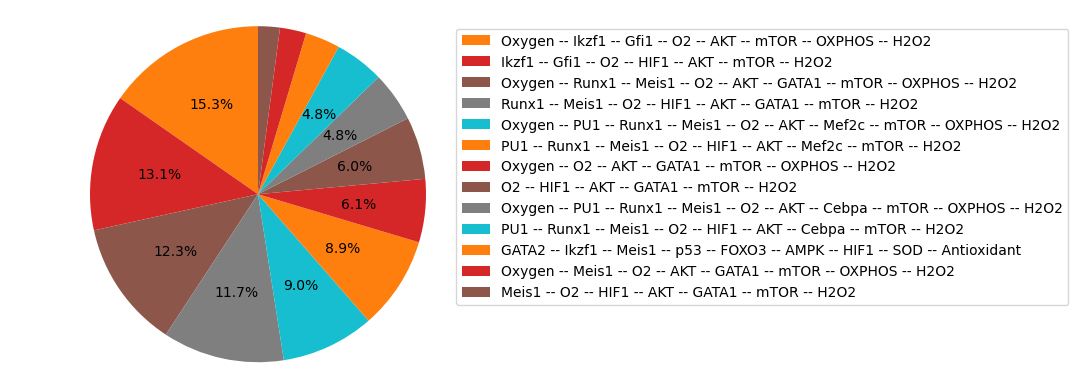

In [56]:
# Run the simulation and plot all attained stable states
HSC_results = HSC_sim.run()
HSC_results.plot_piechart()

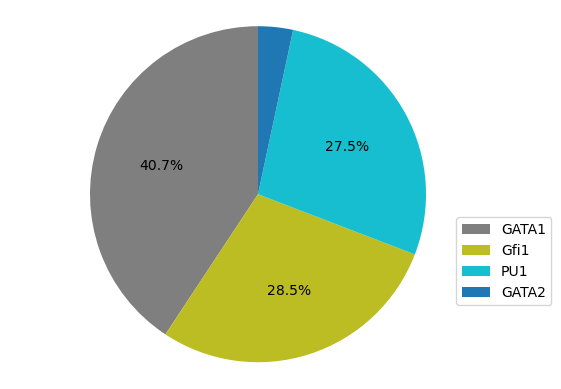

In [57]:
# Plot the frequency of every cell type as defined by specified marker TFs
HSC_states = HSC_sim.copy()
HSC_states.network.set_output(('GATA2', 'GATA1', 'PU1', 'Gfi1'))
HSC_states_results = HSC_states.run()
HSC_states_results.plot_piechart()

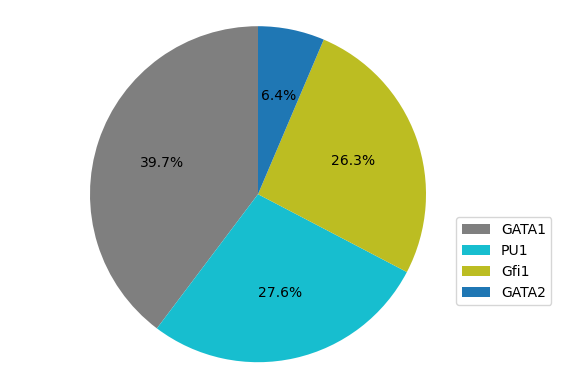

In [58]:
# Plot the frequency of every cell type as defined by specified marker TFs and the Oxygen concentration set to 0
HSC_states_Oxygen_0 = HSC_sim.copy()
maboss.set_nodes_istate(HSC_states_Oxygen_0, ["Oxygen"], [1, 0])
HSC_states_Oxygen_0.network.set_output(('GATA2', 'GATA1', 'PU1', 'Gfi1',))
HSC_states_Oxygen_0_results = HSC_states_Oxygen_0.run()
HSC_states_Oxygen_0_results.plot_piechart()

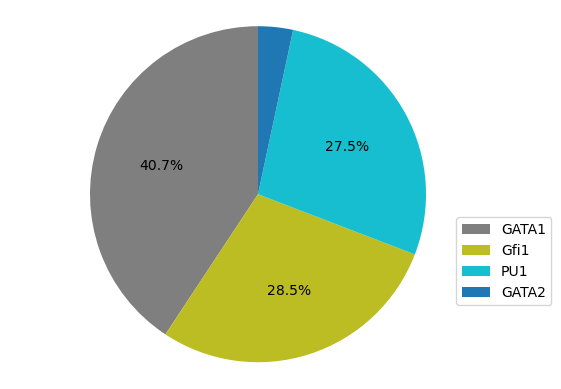

In [59]:
# Plot the frequency of every cell type as defined by specified marker TFs and the Oxygen concentration set to 0.5
HSC_states_Oxygen_05 = HSC_sim.copy()
maboss.set_nodes_istate(HSC_states_Oxygen_05, ["Oxygen"], [0.5, 0.5])
HSC_states_Oxygen_05.network.set_output(('GATA2', 'GATA1', 'PU1', 'Gfi1'))
HSC_states_Oxygen_05_results = HSC_states_Oxygen_05.run()
HSC_states_Oxygen_05_results.plot_piechart()

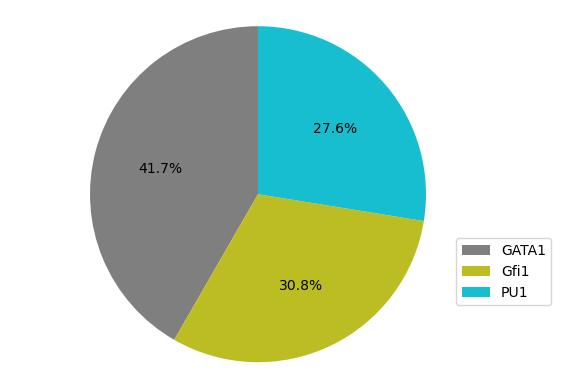

In [60]:
# Plot the frequency of every cell type as defined by specified marker TFs and the Oxygen concentration set to 1
HSC_states_Oxygen_1 = HSC_sim.copy()
maboss.set_nodes_istate(HSC_states_Oxygen_1, ["Oxygen"], [0, 1])
HSC_states_Oxygen_1.network.set_output(('GATA2', 'GATA1', 'PU1', 'Gfi1'))
HSC_states_Oxygen_1_results = HSC_states_Oxygen_1.run()
HSC_states_Oxygen_1_results.plot_piechart()

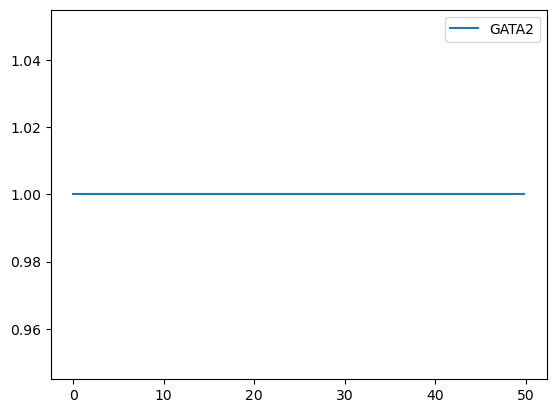

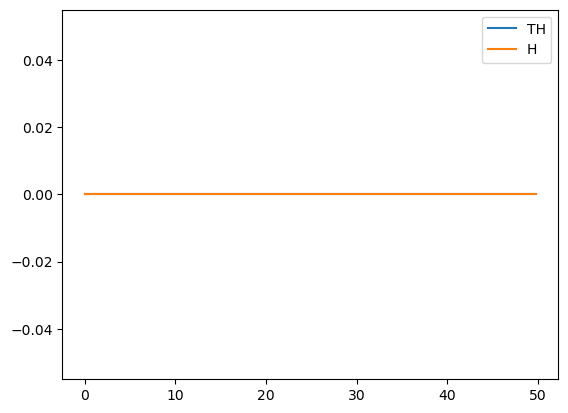

In [61]:
# Simulation without stochastic fluctuations. Oxygen level set to 0. 
HSC_drift_0 = HSC_sim.copy()
maboss.set_nodes_istate(HSC_drift_0, ["Oxygen" ], [1,0])
maboss.set_nodes_istate(HSC_drift_0, ["Runx1", "GATA1", "PU1", "Cebpa", "Gfi1", "Mef2c", "mTOR", "AKT","H2O2", "O2", "OXPHOS"], [1,0 ])
maboss.set_nodes_istate(HSC_drift_0, ["Meis1", "HIF1","FOXO3", "p53", "GATA2", "Ikzf1", "AMPK", "SOD",  "Antioxidant"], [0,1 ])
HSC_drift_0.network.set_output(('GATA2', 'GATA1', 'PU1', 'Gfi1'))
HSC_drift_0_results = HSC_drift_0.run()
#HSC_drift_0_results.plot_piechart()
#HSC_drift_0_results.plot_trajectory()

figura1 =HSC_drift_0_results.get_states_probtraj()
figura1.plot()
plt.savefig('hsc_drift_0.pdf')

entropy= HSC_drift_0_results.get_entropy_trajectory()
entropy.plot()
plt.savefig('entropy_No_drift.pdf')


In [ ]:
# Genetic drift. Stochastic fluctuations are allowed at the nodes inactive at the HSC state. Oxygen set to 0
HSC_drift_b = HSC_sim.copy()
maboss.set_nodes_istate(HSC_drift_b, ["Oxygen" ], [1,0])
maboss.set_nodes_istate(HSC_drift_b, ["Runx1", "GATA1", "PU1", "Cebpa", "Gfi1", "Mef2c", "mTOR", "AKT","H2O2", "O2", "OXPHOS", ], [0.8,0.2 ])
maboss.set_nodes_istate(HSC_drift_b, ["Meis1", "HIF1","FOXO3", "p53", "GATA2", "Ikzf1", "AMPK", "SOD",  "Antioxidant"], [0,1 ])
HSC_drift_b.network.set_output(('GATA2', 'GATA1', 'PU1', 'Gfi1'))
HSC_drift_b_results = HSC_drift_b.run()
#HSC_drift_b_results.plot_piechart()
#HSC_drift_b_results.plot_trajectory()
figura2 =HSC_drift_b_results.get_states_probtraj()
figura2.plot()
plt.savefig('hsc_drift_b.pdf')

entropy_b= HSC_drift_b_results.get_entropy_trajectory()
entropy_b.plot()
plt.savefig('entropy_b.pdf')

In [ ]:
# Genetic drift. Stochastic fluctuations are allowed at the nodes active at the HSC state. Oxygen set to 0
HSC_drift_m = HSC_sim.copy()
maboss.set_nodes_istate(HSC_drift_m, ["Oxygen" ], [1,0])
maboss.set_nodes_istate(HSC_drift_m, ["Runx1", "GATA1", "PU1", "Cebpa", "Gfi1", "Mef2c", "mTOR", "AKT","H2O2", "O2", "OXPHOS", ], [1,0 ])
maboss.set_nodes_istate(HSC_drift_m, ["Meis1", "HIF1","FOXO3", "p53", "GATA2", "Ikzf1", "AMPK", "SOD",  "Antioxidant"], [0.2,0.8 ])
HSC_drift_m.network.set_output(('GATA2', 'GATA1', 'PU1', 'Gfi1'))
HSC_drift_m_results = HSC_drift_m.run()
#HSC_drift_m_results.plot_piechart()
#HSC_drift_m_results.plot_trajectory()
figura3 =HSC_drift_m_results.get_states_probtraj()
figura3.plot()
plt.savefig('hsc_drift_m.pdf')

entropy_m= HSC_drift_m_results.get_entropy_trajectory()
entropy_m.plot()
plt.savefig('entropy_m.pdf')

In [ ]:
# Genetic drift. Stochastic fluctuations are allowed in both active and inactive at  the HSC state. Oxygen set to 0
HSC_drift_bm = HSC_sim.copy()
maboss.set_nodes_istate(HSC_drift_bm, ["Oxygen" ], [1,0])
maboss.set_nodes_istate(HSC_drift_bm, ["Runx1", "GATA1", "PU1", "Cebpa", "Gfi1", "Mef2c", "mTOR", "AKT","H2O2", "O2", "OXPHOS", ], [0.8,0.2 ])
maboss.set_nodes_istate(HSC_drift_bm, ["Meis1", "HIF1","FOXO3", "p53", "GATA2", "Ikzf1", "AMPK", "SOD",  "Antioxidant"], [0.2,0.8 ])
HSC_drift_bm.network.set_output(('GATA2', 'GATA1', 'PU1', 'Gfi1'))
HSC_drift_bm_results = HSC_drift_bm.run()
#HSC_drift_b_results.plot_piechart()
#HSC_drift_b_results.plot_trajectory()
figura4 =HSC_drift_bm_results.get_states_probtraj()
figura4.plot()
plt.savefig('hsc_drift_bm.pdf')

entropy_bm = HSC_drift_bm_results.get_entropy_trajectory()
entropy_bm.plot()
plt.savefig('entropy_bm.pdf')